In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import datetime as dt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from lifetimes.utils import summary_data_from_transaction_data
from jcopml.plot import plot_missing_value

In [6]:
onlineretail = pd.read_csv(r"C:\Users\SHELY MULIAWATI\Documents\OnlineRetail.csv", encoding = 'unicode_escape')

In [7]:
onlineretail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
onlineretail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
onlineretail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [19]:
onlineretail.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [29]:
!pip install missingno
import missingno as msno

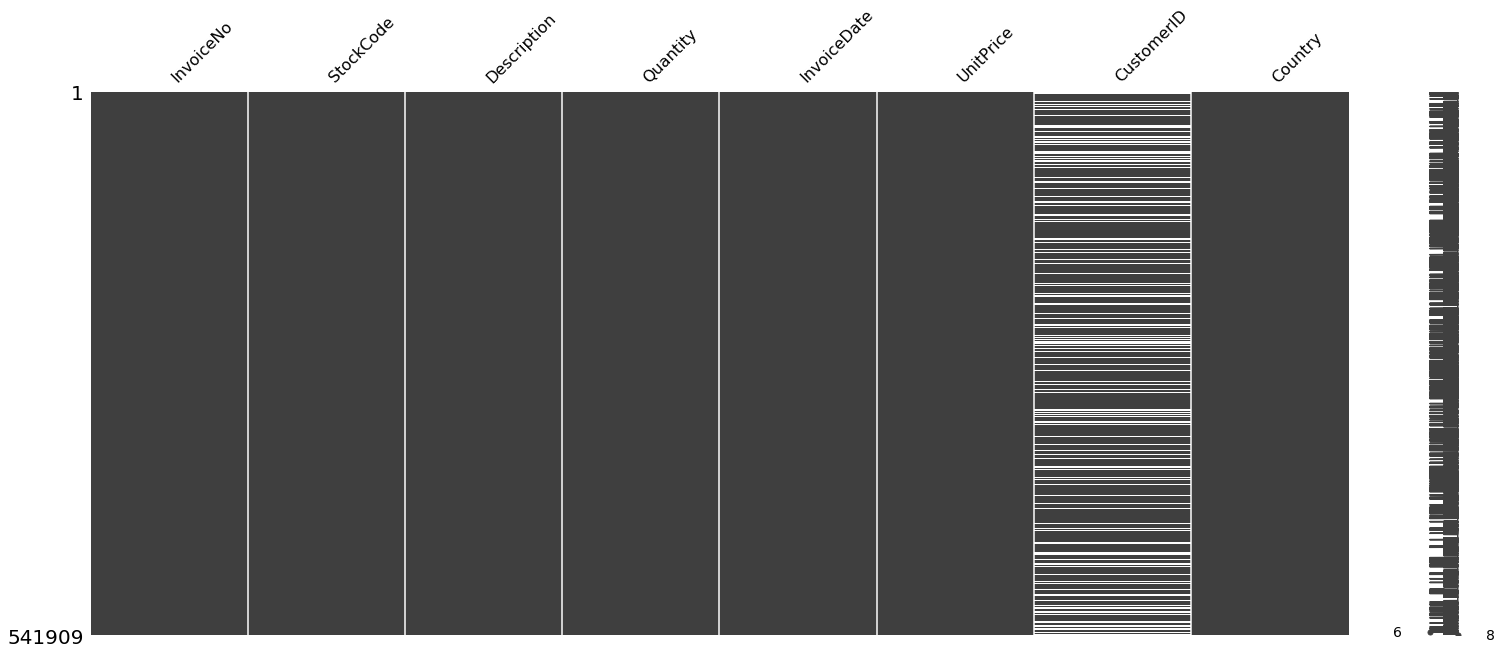

In [30]:
msno.matrix(onlineretail) 

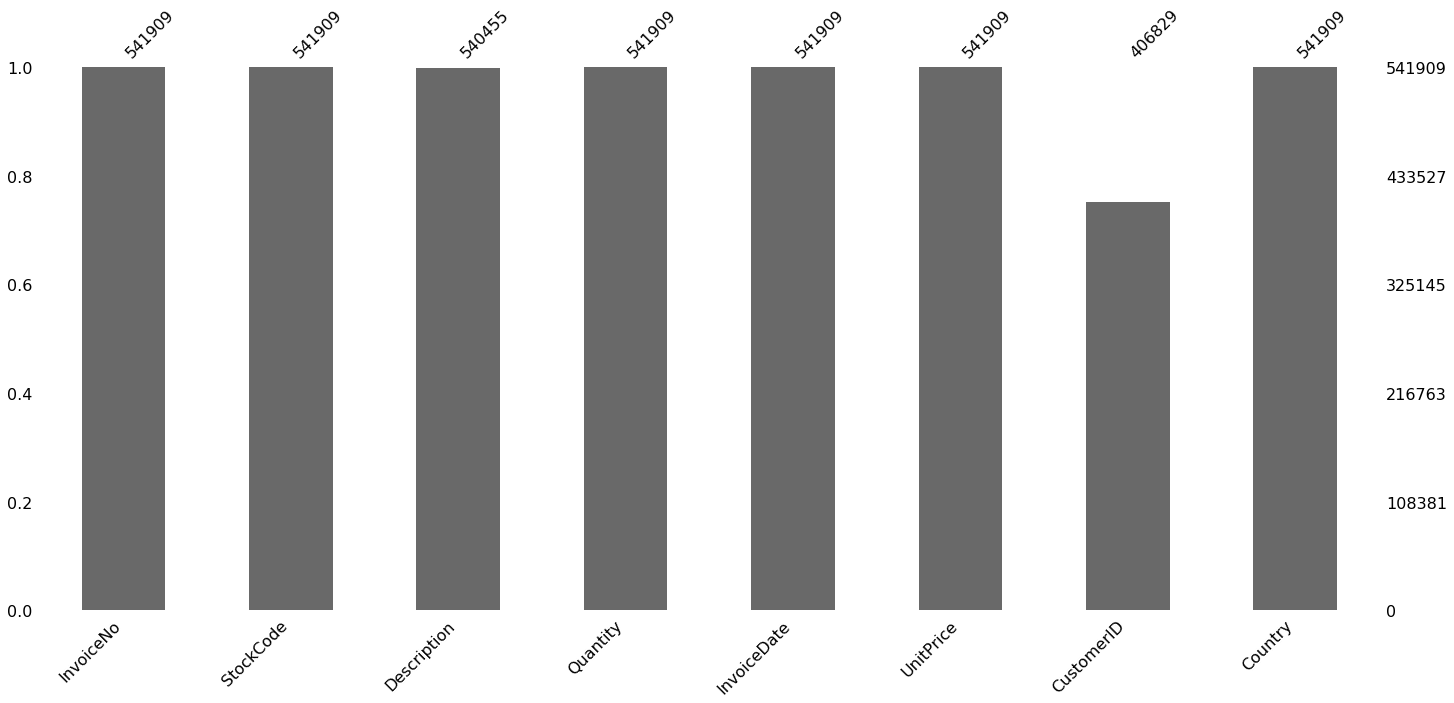

In [31]:
msno.bar(onlineretail)

In [32]:
!pip install squarify

In [34]:
onlineretail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [36]:
q1_quan = onlineretail['Quantity'].quantile(0.25)
q3_quan = onlineretail['Quantity'].quantile(0.75)
iqr_quan = q3_quan - q1_quan
lb_quan = float(q1_quan) - (1.5 * iqr_quan)
ub_quan = float(q3_quan) + (1.5 * iqr_quan)

print('Q1 = {}'.format(q1_quan))
print('Q3 = {}'.format(q3_quan))
print('IQR = Q3 - Q1 = {}'.format(iqr_quan))
print('lower bound = Q1 - 1.5 * IQR = {}'.format(lb_quan))
print('upper bound = Q3 + 1.5 * IQR = {}'.format(ub_quan))


Q1 = 1.0
Q3 = 10.0
IQR = Q3 - Q1 = 9.0
lower bound = Q1 - 1.5 * IQR = -12.5
upper bound = Q3 + 1.5 * IQR = 23.5


In [37]:
q1_unit = onlineretail['UnitPrice'].quantile(0.25)
q3_unit = onlineretail['UnitPrice'].quantile(0.75)
iqr_unit = q3_unit - q1_unit 
lb_unit = float(q1_unit) - (1.5 * iqr_unit)
ub_unit = float(q3_unit) + (1.5 * iqr_unit)

print('Q1 = {}'.format(q1_unit))
print('Q3 = {}'.format(q3_unit))
print('IQR = Q3 - Q1 = {}'.format(iqr_unit))
print('lower bound = Q1 - 1.5 * IQR = {}'.format(lb_unit))
print('upper bound = Q1 - 1.5 * IQR = {}'.format(ub_unit))


Q1 = 1.25
Q3 = 4.13
IQR = Q3 - Q1 = 2.88
lower bound = Q1 - 1.5 * IQR = -3.0700000000000003
upper bound = Q1 - 1.5 * IQR = 8.45


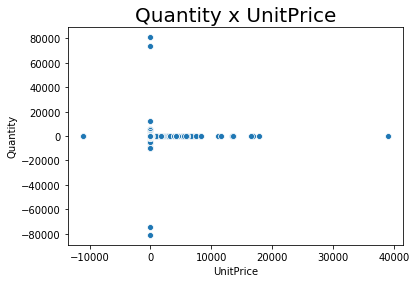

In [39]:
sns.scatterplot(onlineretail['UnitPrice'], onlineretail['Quantity'])
plt.title('Quantity x UnitPrice', fontsize = 20);

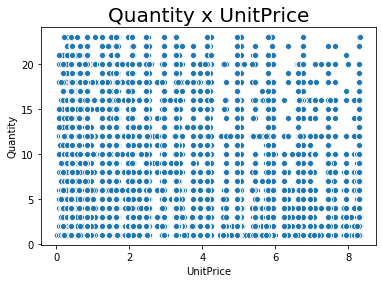

In [40]:
dx = onlineretail[onlineretail['Quantity']>0] #hilangkan value negatif
dy = onlineretail[onlineretail['UnitPrice']>0] #hilangkan value negatif

filtered_quantity = dx.query('(@q1_quan - 1.5 * @iqr_quan) <= Quantity <= (@q3_quan + 1.5 * @iqr_quan)')
filtered_unitprice = dy.query('(@q1_unit - 1.5 * @iqr_unit) <= UnitPrice <= (@q3_unit + 1.5 * @iqr_unit)')

sns.scatterplot(filtered_unitprice['UnitPrice'], filtered_quantity['Quantity'])
plt.title('Quantity x UnitPrice', fontsize = 20);



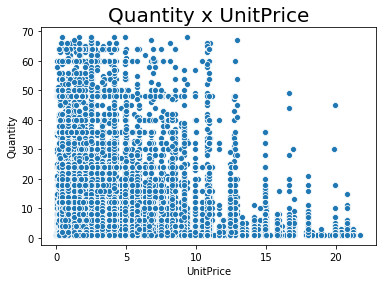

In [41]:
q1_quan_custom = onlineretail['Quantity'].quantile(0.5)
q3_quan_custom = onlineretail['Quantity'].quantile(0.95)
iqr_quan_custom = q3_quan_custom - q1_quan_custom

q1_unit_custom = onlineretail['UnitPrice'].quantile(0.5)
q3_unit_custom = onlineretail['UnitPrice'].quantile(0.95)
iqr_unit_custom = q3_unit_custom - q1_unit_custom

dx = onlineretail[onlineretail['Quantity']>0] #hilangkan value negatif
dy = onlineretail[onlineretail['UnitPrice']>0] #hilangkan value negatif

filtered_quantity = dx.query('(@q1_quan_custom - 1.5 * @iqr_quan_custom) <= Quantity <= (@q3_quan_custom + 1.5 * @iqr_quan_custom)')
filtered_unitprice = dy.query('(@q1_unit_custom - 1.5 * @iqr_unit_custom) <= UnitPrice <= (@q3_unit_custom + 1.5 * @iqr_unit_custom)')

sns.scatterplot(filtered_unitprice['UnitPrice'], filtered_quantity['Quantity'])
plt.title('Quantity x UnitPrice', fontsize = 20);



Text(0, 0.5, 'count')

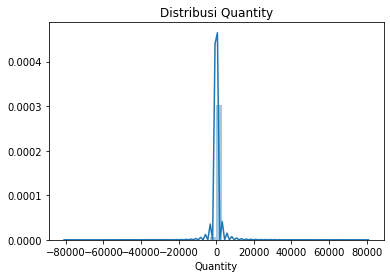

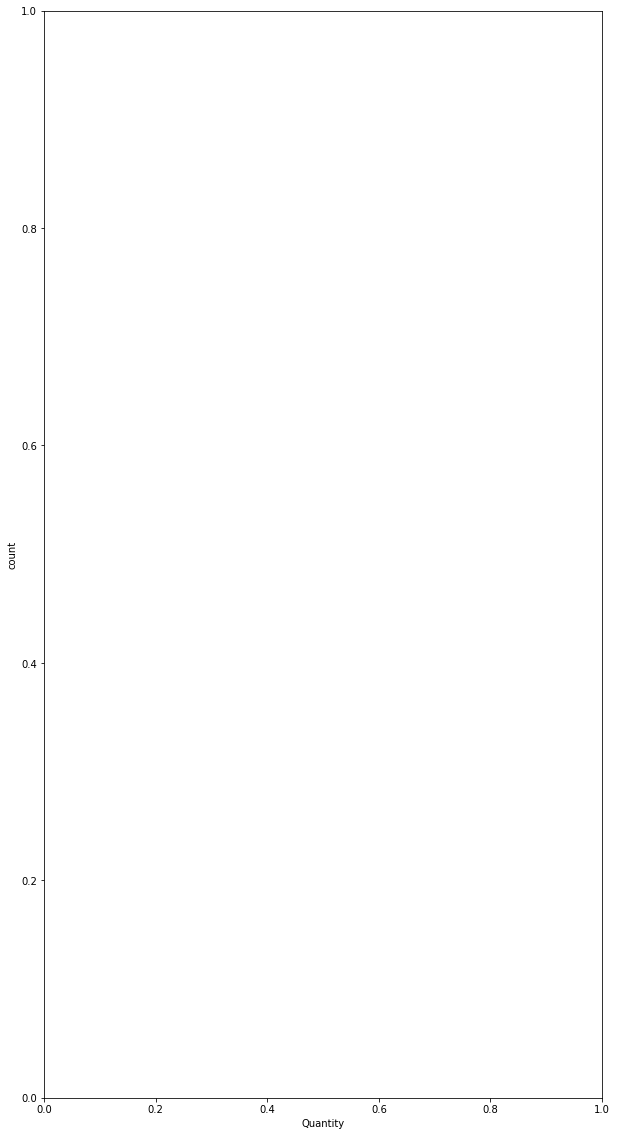

In [48]:
sns.distplot(onlineretail['Quantity'])
plt.title('Distribusi Quantity')
plt.figure(figsize=(10,20))
plt.xlabel('Quantity')
plt.ylabel('count')

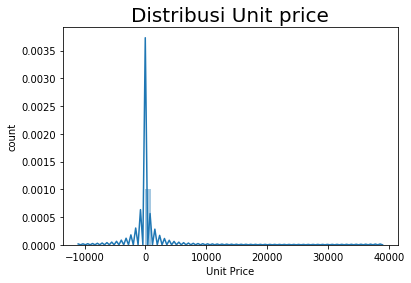

In [53]:
sns.distplot(onlineretail['UnitPrice'])
plt.title('Distribusi Unit price', fontsize = 20)
plt.xlabel('Unit Price')
plt.ylabel('count');

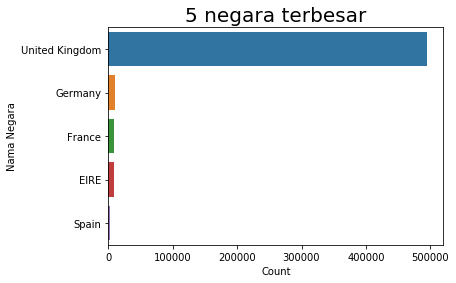

In [54]:
x = onlineretail['Country'].value_counts().head(5)
sns.barplot(x = x.values, y = x.index, )
plt.title('5 negara terbesar', fontsize = 20)
plt.xlabel('Count')
plt.ylabel('Nama Negara');

In [58]:
x = onlineretail['Country'].nunique()
print("Terdapat total {} negara".format(x))

country = pd.DataFrame(onlineretail['Country'].value_counts()).reset_index()
country.columns = ['Negara', 'Jumlah Transaksi']
country

Terdapat total 38 negara


,Negara,Jumlah Transaksi
0,United Kingdom,495478
1,Germany,9495
2,France,8557
3,EIRE,8196
4,Spain,2533
5,Netherlands,2371
6,Belgium,2069
7,Switzerland,2002
8,Portugal,1519
9,Australia,1259


In [60]:
onlineretail['InvoiceDate'] = pd.to_datetime(onlineretail['InvoiceDate'])
onlineretail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [61]:
onlineretail = onlineretail.dropna()
onlineretail.shape

(406829, 8)

In [62]:
onlineretail.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [63]:
#buang yg quantitynya nol dan harganya ngaco atau minus
onlineretail = onlineretail[onlineretail['Quantity']>0]
onlineretail = onlineretail[onlineretail['UnitPrice']>0]
onlineretail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [64]:
onlineretail['Revenue'] = onlineretail['Quantity'] * onlineretail['UnitPrice']
onlineretail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [65]:
#Buat dataframe baru, agregatkan semua data berdasarkan InvoiceNo dan InvoiceDate
orders = onlineretail.groupby(['InvoiceNo', 'InvoiceDate']).sum().reset_index()
orders.head()

,InvoiceNo,InvoiceDate,Quantity,UnitPrice,CustomerID,Revenue
0,536365,2010-12-01 08:26:00,40,27.37,124950.0,139.12
1,536366,2010-12-01 08:28:00,12,3.70,35700.0,22.20
2,536367,2010-12-01 08:34:00,83,58.24,156564.0,278.73
3,536368,2010-12-01 08:34:00,15,19.10,52188.0,70.05
4,536369,2010-12-01 08:35:00,3,5.95,13047.0,17.85


In [66]:
#Step 1, hitung RFM Value Step 2, hitung RFM Score Step 3, hitung score RFM secara keseluruhan Step 4, labeling
rfm = summary_data_from_transaction_data(orders, 'CustomerID', 'InvoiceDate', monetary_value_col='Revenue').reset_index()
rfm

,CustomerID,frequency,recency,T,monetary_value
0,12346.0,0.0,0.0,325.0,0.0
1,12365.0,0.0,0.0,291.0,0.0
2,12371.0,0.0,0.0,44.0,0.0
3,12381.0,1.0,1.0,59.0,4.5
4,12409.0,0.0,0.0,79.0,0.0
...,...,...,...,...,...
14760,6131760.0,0.0,0.0,39.0,0.0
14761,6230432.0,0.0,0.0,16.0,0.0
14762,7456784.0,0.0,0.0,4.0,0.0
14763,7513168.0,0.0,0.0,11.0,0.0


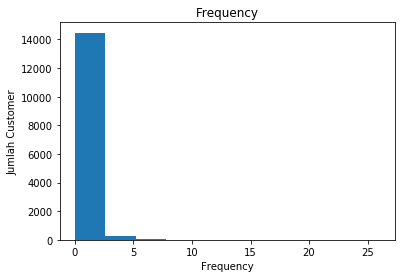

In [67]:
plt.hist(rfm['frequency'])
plt.title('Frequency')
plt.ylabel('Jumlah Customer' )
plt.xlabel('Frequency');

In [68]:
#customer yang tidak melakukan transaksi ulang jumlahnya sangat mendominasi. 
#Untuk membuat segmen yang lebih masuk akal, 
#kita akan membuang data customer yang tidak melakukan pembelian ulang
rfm = rfm[rfm['frequency']>0]
rfm.head()

,CustomerID,frequency,recency,T,monetary_value
3,12381.0,1.0,1.0,59.0,4.500000
5,12415.0,7.0,309.0,333.0,450.388571
7,12431.0,1.0,101.0,136.0,601.440000
12,12457.0,3.0,167.0,233.0,184.233333
14,12471.0,4.0,299.0,364.0,87.425000


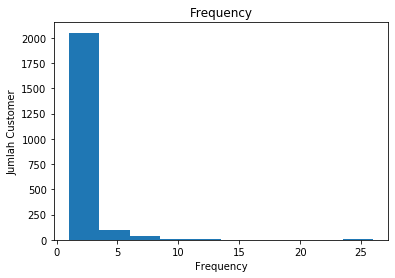

In [69]:
plt.hist(rfm['frequency'])
plt.title('Frequency')
plt.ylabel('Jumlah Customer', )
plt.xlabel('Frequency');

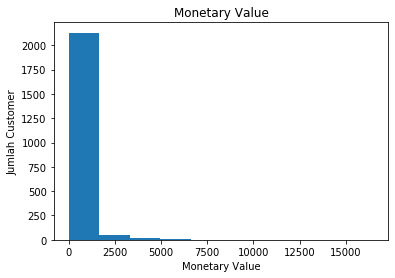

In [70]:
plt.hist(rfm['monetary_value'])
plt.title('Monetary Value')
plt.ylabel('Jumlah Customer', )
plt.xlabel('Monetary Value');

In [71]:
rfm = rfm[rfm['monetary_value']<2000]
rfm.head()

,CustomerID,frequency,recency,T,monetary_value
3,12381.0,1.0,1.0,59.0,4.500000
5,12415.0,7.0,309.0,333.0,450.388571
7,12431.0,1.0,101.0,136.0,601.440000
12,12457.0,3.0,167.0,233.0,184.233333
14,12471.0,4.0,299.0,364.0,87.425000


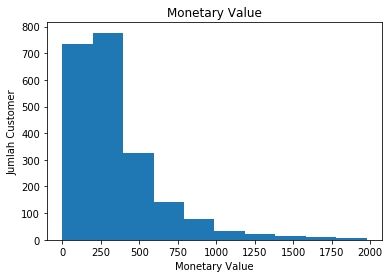

In [72]:
plt.hist(rfm['monetary_value'])
plt.title('Monetary Value')
plt.ylabel('Jumlah Customer', )
plt.xlabel('Monetary Value');

In [73]:
quartiles = rfm.quantile(q=[0.25, 0.5, 0.75])
quartiles

,CustomerID,frequency,recency,T,monetary_value
0.25,68472.5,1.0,61.0,176.0,149.010
0.50,162708.0,1.0,129.0,254.0,300.790
0.75,295276.5,2.0,220.5,322.0,440.825


In [86]:
def recency_score (data):
    if data <= 60:
        return 1
    elif data <= 128:
        return 2
    elif data <= 221:
        return 3
    else:
        return 4

def frequency_score (data):
    if data <= 1:
        return 1
    elif data <= 1:
        return 2
    elif data <= 2:
        return 3
    else:
        return 4
def monetary_value_score (data):
    if data <= 142.935:   
        return 1
    elif data <= 292.555:
        return 2
    elif data <= 412.435:
        return 3
    else:
        return 4

rfm['R'] = rfm['recency'].apply(recency_score )
rfm['F'] = rfm['frequency'].apply(frequency_score)
rfm['M'] = rfm['monetary_value'].apply(monetary_value_score)
rfm.head()

,CustomerID,frequency,recency,T,monetary_value,R,F,M
3,12381.0,1.0,1.0,59.0,4.500000,1,1,1
5,12415.0,7.0,309.0,333.0,450.388571,4,4,4
7,12431.0,1.0,101.0,136.0,601.440000,2,1,4
12,12457.0,3.0,167.0,233.0,184.233333,3,4,2
14,12471.0,4.0,299.0,364.0,87.425000,4,4,1


In [87]:
rfm['RFM_score'] = rfm[['R', 'F', 'M']].sum(axis=1)
rfm.head()

,CustomerID,frequency,recency,T,monetary_value,R,F,M,RFM_score
3,12381.0,1.0,1.0,59.0,4.500000,1,1,1,3
5,12415.0,7.0,309.0,333.0,450.388571,4,4,4,12
7,12431.0,1.0,101.0,136.0,601.440000,2,1,4,7
12,12457.0,3.0,167.0,233.0,184.233333,3,4,2,9
14,12471.0,4.0,299.0,364.0,87.425000,4,4,1,9


In [88]:
rfm['label'] = 'Bronze' 
rfm.loc[rfm['RFM_score'] > 4, 'label'] = 'Silver' 
rfm.loc[rfm['RFM_score'] > 6, 'label'] = 'Gold'
rfm.loc[rfm['RFM_score'] > 8, 'label'] = 'Platinum'
rfm.loc[rfm['RFM_score'] > 10, 'label'] = 'Diamond'

rfm.head()

,CustomerID,frequency,recency,T,monetary_value,R,F,M,RFM_score,label
3,12381.0,1.0,1.0,59.0,4.500000,1,1,1,3,Bronze
5,12415.0,7.0,309.0,333.0,450.388571,4,4,4,12,Diamond
7,12431.0,1.0,101.0,136.0,601.440000,2,1,4,7,Gold
12,12457.0,3.0,167.0,233.0,184.233333,3,4,2,9,Platinum
14,12471.0,4.0,299.0,364.0,87.425000,4,4,1,9,Platinum


   Silver  Gold  Bronze  Platinum  Diamond
      723   577     351       335      161


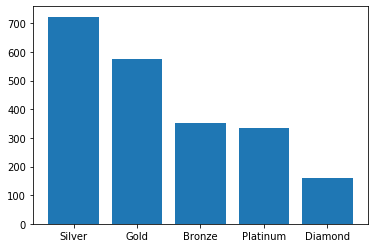

In [89]:
barplot = dict(rfm['label'].value_counts())
bar_names = list(barplot.keys())
bar_values = list(barplot.values())
plt.bar(bar_names,bar_values)
print(pd.DataFrame(barplot, index=[' ']))

In [91]:
onlineretail['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 397884, dtype: datetime64[ns]